In [1]:
import pandas as panda 
from matplotlib import pyplot as plt

In [2]:
dataframe = panda.read_csv('Ruter_data.csv',delimiter=';')
dataframe['Brukt_Kapasitet_%'] = (dataframe.loc[:, 'Passasjerer_Ombord'] / dataframe.loc[:, 'Kjøretøy_Kapasitet'] * 100)
dataframe.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


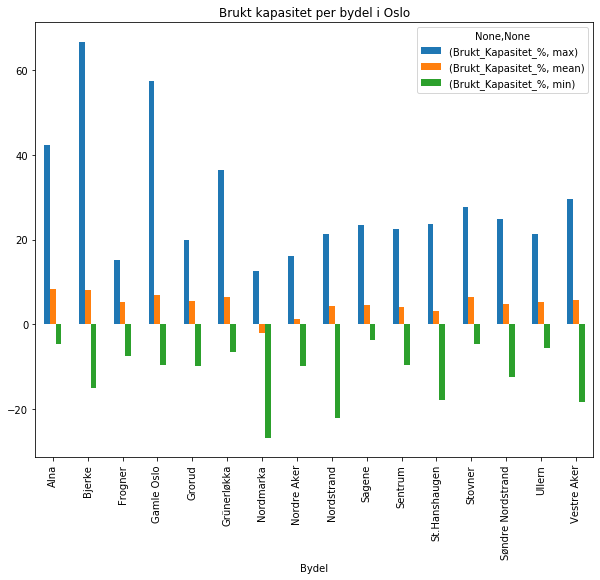

In [7]:
is_oslo = dataframe.Fylke == 'Oslo'
oslo_data = dataframe[is_oslo]
oslo_data.index.names = ['Bydel']

bus_capacity_oslo = oslo_data.groupby(by='Kommune').agg({ 'Brukt_Kapasitet_%': ['max', 'mean', 'min'] })

bus_capacity_oslo.plot.bar(figsize=(10, 8), xticks=range(len(bus_capacity_oslo)), rot=90, title='Brukt kapasitet per bydel i Oslo')

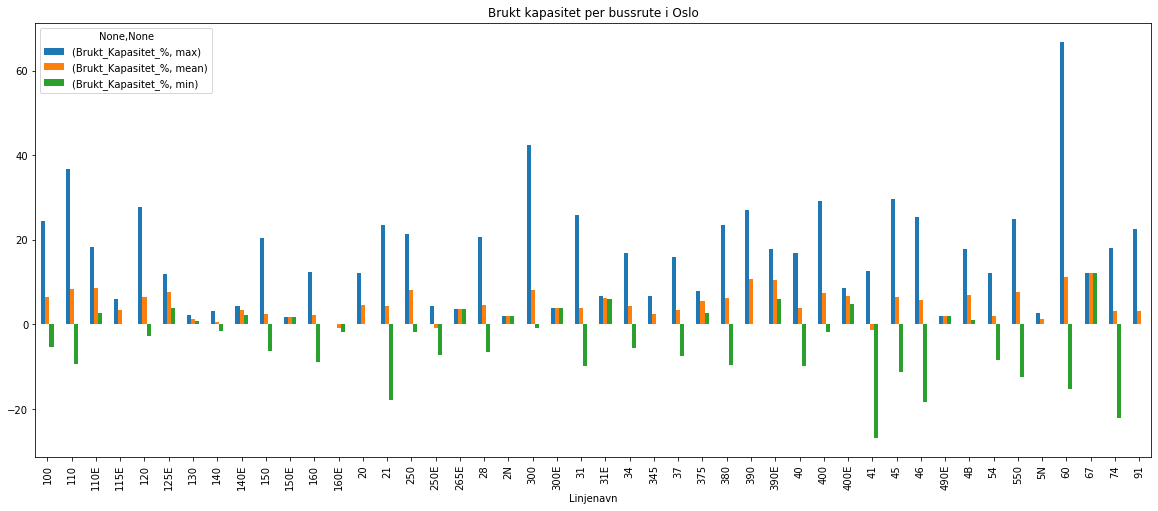

In [25]:
bus_capacity_routes_oslo = oslo_data.groupby(by='Linjenavn').agg({ 'Brukt_Kapasitet_%': ['max', 'mean', 'min'] })
bus_capacity_routes_oslo.plot.bar(figsize=(20, 8), xticks=range(len(bus_capacity_routes_oslo)), rot=90, title='Brukt kapasitet per bussrute i Oslo')

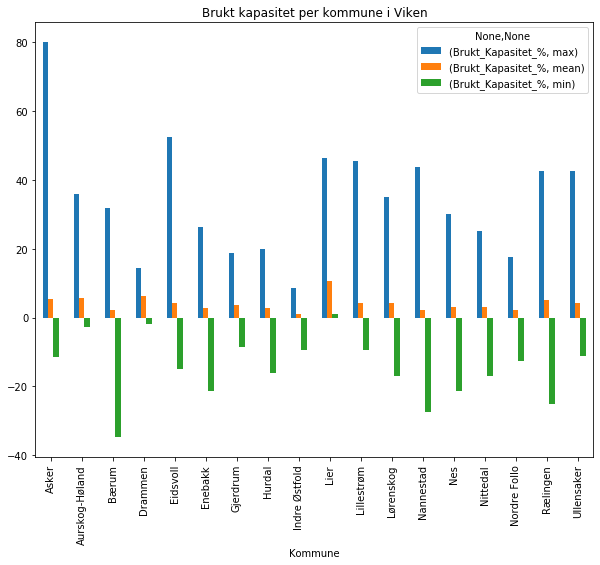

In [8]:
is_viken = dataframe.Fylke == 'Viken'
viken_data = dataframe[is_viken]

bus_capacity_viken = viken_data.groupby(by='Kommune').agg({ 'Brukt_Kapasitet_%': ['max', 'mean', 'min'] })

bus_capacity_viken.plot.bar(figsize=(10, 8), xticks=range(len(bus_capacity_viken)), rot=90,  title='Brukt kapasitet per kommune i Viken')

In [12]:
dataframe.agg({ 'Brukt_Kapasitet_%': 'mean' })

Brukt_Kapasitet_%    4.396286
dtype: float64